<a href="https://colab.research.google.com/github/ArSfllah/TURF-Statistika-Multivariat/blob/main/Analisis_Preferensi_Paket_Travelling_Menentukan_Kombinasi_Aktivitas_Travelling_untuk_Wisatawan_dengan_Metode_TURF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

|         Nama Mahasiswa          |      NIM       | Kelas |
| --------------------------------| ---------------| ------|
| Baharuddiin Saefullah Asyubanji | 11220940000001 |   6B  |


# Analisis Preferensi Paket Travelling: Menentukan Kombinasi Aktivitas Travelling untuk Wisatawan dengan Metode TURF

## Latar Belakang
Dalam industri pariwisata , paket wisata biasanya terdiri dari beberapa kombinasi rencana aktivitas yang ditawarkan untuk wisatawan Mancanegara. Dengan metode TURF analysis, maka akan dapat diidentifikasikan kombinasi yang sesuai dan juga mencakup preferensi terbanyak tanpa ada duplikasi. Hal ini tentunya membantu suatu travel agensi dalam merancang paket yang lebih menarik dan efisien.

## Rumusan Masalah


*   Kombinasi aktivitas dalam Jenis Paket Travelling.
*   Bagaimana metode TURF nantinya dapat digunakan untuk merancang aktivitas yang optimal dari setiap paket travelling.



## Tujuan Dilakukannya Analisis

*   Menentukan kombinasi aktivitas yang paling banyak disukai oleh para wisatawan.
*   Memberikan rekomendasi aktivitas travelling berdasarkan dengan hasil yang didapatkan dari analisis TURF.

## Metode Analisis


*   Jenis analisisnya itu Kualitatif deskriptif
*   Menggunakan medote TURF (Total Unduplicated Reach and Frequency)
*   Pengumpulan data dari wisatawan




## Asumsi


*   Preferensi wisatawan terhadap pemilihan paket trevalling dianggap dapat direpresentasikkan secara biner (dipilih atau tidak), llu pilihan tersebut juga mencerminkan minat aktual tanpa mempertimbangkan intensitas atau urutan prioritas.
*   Respon diasusmsikan membuat pilihan independen, tanpa pengaruh sorial dan budaya dati responden lainnya
*   Kombinasi aktivitas yang mendapatkan nilai yang tinggi tentusaja dianggap mewakili potensi jangkauan pasar yang besar, dengan begitu strategi penyusunan paket Aktivitas Travelling cukup dengan difokuskan pada kombinasi yang paling optimal tanpa harus mencakup semua aktivitas yang ditawarkan.
*   Data yang digunakan diasumsikan cukup merepresentasikan populasi wisatawan yang menjadi target analisis



## Generate Data

In [24]:
import pandas as pd
import random
import numpy as np # Import numpy and alias it as np

# Set seed for reproducibility
random.seed(42)

# Define options for each category
activities = ["Snorkeling", "City Tour", "Kuliner", "Hiking", "Wisata Budaya", "Spa", "Belanja"]

# Number of simulated respondents
num_respondents = 1500

# Simulate preferences: each respondent chooses multiple options from each category
data = []
for i in range(num_respondents):
    respondent = {
        "Respondent_ID": i + 1,
        "Activities": random.sample(activities, k=random.randint(2, 4)),
    }
    data.append(respondent)

# Convert to DataFrame
df = pd.DataFrame(data)


# Expand list columns into binary indicator columns (for TURF analysis)
def expand_multichoice_column(df, column_name, options):
    expanded = pd.DataFrame(0, index=df.index, columns=options)
    for i, row in df.iterrows():
        for option in row[column_name]:
            expanded.at[i, option] = 1
    return expanded

df_acts = expand_multichoice_column(df, "Activities", activities)

# Combine all into one DataFrame
df_combined = pd.concat([df[["Respondent_ID"]], df_acts], axis=1)

# Tambahkan kolom "Jenis Travel"
travel_types = ["Solo Travelling", "Grup Travelling"]
# Now np is defined because numpy is imported
df_combined.insert(1, "Jenis Travel", np.random.choice(travel_types, size=len(df_combined)))


# Simpan ke CSV
df_combined.to_csv('Preferensi Paket Wisata.csv', index=False)

df_combined.head()

,Respondent_ID,Jenis Travel,Snorkeling,City Tour,Kuliner,Hiking,Wisata Budaya,Spa,Belanja
0,1,Grup Travelling,1,1,1,0,0,0,1
1,2,Grup Travelling,0,1,0,0,0,1,0
2,3,Grup Travelling,0,0,0,0,0,1,1
3,4,Grup Travelling,1,0,0,1,1,0,1
4,5,Solo Travelling,1,1,0,0,0,0,0


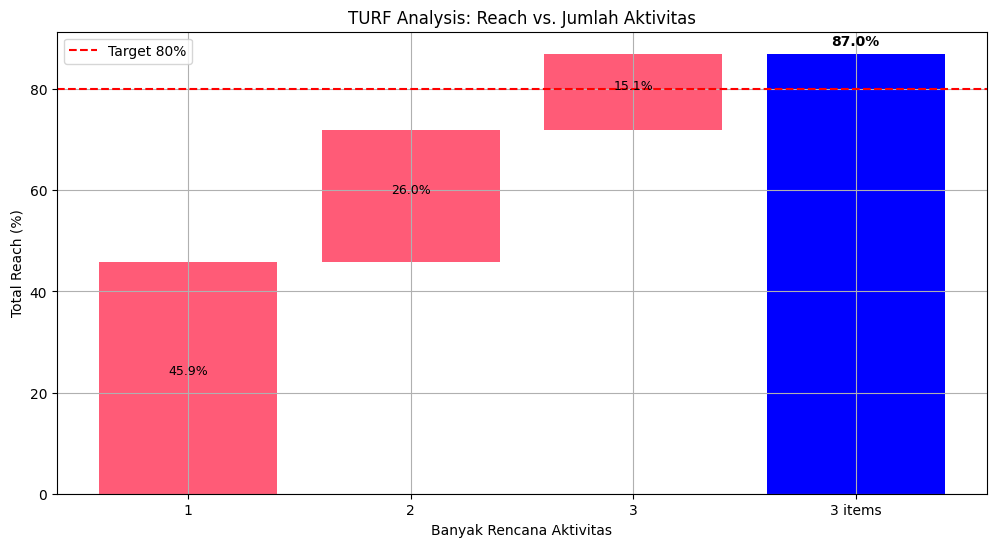

Untuk mencapai minimal 80%, perlu 3 Jenis Aktivitas.

 Jenis aktivitas agar mencapi target : ['Spa', 'Kuliner', 'Belanja']


In [25]:
import matplotlib.pyplot as plt

# @title Reach vs Rencana Aktifitas
data_used = df_combined #@param {type:"string"}
jenis_travel = 'All' # @param ["All", "Solo Travelling", "Grup Travelling"]
target_dalam_persen = 80 # @param

if jenis_travel != 'All':
  data_used = data_used[data_used['Jenis Travel']==jenis_travel] #Filter Jenis Travel

if len(data_used)==0:
    raise SystemExit("Data kosong! Program dihentikan.")

target_reach_pct = target_dalam_persen/100
target_reach = int(target_reach_pct * len(data_used))

index_ = data_used.columns.get_loc("Snorkeling")   #nomor kolom data
reach_per_item = data_used[data_used.keys()[(index_):]].sum(axis=0).sort_values(ascending=False)   #hitung frekuensi lalu sorting dari yang terbesar

#Algoritma Greedy untuk menemukan kombinasi optimal
selected_items = []
current_reach = set()
reach_progress = []

for item in reach_per_item.index:    #hitung reach
    new_reach = current_reach | set(data_used.index[data_used[item] == 1])  # Tambah reach baru
    selected_items.append(item)
    reach_progress.append(len(new_reach) / len(data_used))  # Simpan progres reach

    if len(new_reach) >= target_reach:
        break  # Selesai jika sudah mencapai target

    current_reach = new_reach  # Perbarui reach

# Hitung incremental reach
incrementals = [reach_progress[0]] + [reach_progress[i] - reach_progress[i-1] for i in range(1, len(reach_progress))]


# Bar chart bertingkat
plt.figure(figsize=(12, 6))
bottoms = 0
for i, inc in enumerate(incrementals):
    plt.bar("{}".format(i+1), inc * 100, bottom=bottoms, color="#ff5b77")
    plt.text(i, bottoms + inc*50, f"{inc*100:.1f}%", ha='center', va='bottom', fontsize=9)
    bottoms += inc * 100
plt.axhline(y=target_reach_pct * 100, color='r', linestyle='--', label=f'Target {target_reach_pct*100:.0f}%')


# Bar terakhir (semua item, misal 50)
total_reach = len(set(data_used.index[data_used[selected_items[-1]] == 1])) / len(data_used)
plt.bar(f"{len(selected_items)} items", reach_progress[-1] * 100, color="blue")
plt.text(len(selected_items), reach_progress[-1] * 100 + 1, f"{reach_progress[-1]*100:.1f}%",
         ha='center', va='bottom', fontsize=10, fontweight='bold')

#Label
plt.xlabel("Banyak Rencana Aktivitas")
plt.ylabel("Total Reach (%)")
plt.title("TURF Analysis: Reach vs. Jumlah Aktivitas")
plt.legend()
plt.grid(True)
plt.savefig('reach_vs_aktivitas.png')
plt.show()


#Output hasil
max_reach = max(reach_progress)  # Ubah ke persen

if max_reach>=target_reach_pct:
  print(f"Untuk mencapai minimal {target_reach_pct*100:.0f}%, perlu {len(selected_items)} Jenis Aktivitas.")
else:
  print(f"Tidak dapat mencapai {target_reach_pct*100:.0f}%.")
  print(f"maksimal hanya {max_reach*100:.0f}%, dengan {len(selected_items)} OOH")

print("\n Jenis aktivitas agar mencapi target :", selected_items[:len(selected_items)])  # Menampilkan lokasi iklan agar optimal


## Interpretasi


*   Pada hasil akhirnya untuk paket aktivitas dengan akumulasi "Solo Travelling" dan "Group Traveling" dengan jumlah peminat sebanyak 87% paket yang paling optimal dan banyak tentunya banyak peminatnya adalah sebanyak 3 aktivitas, di antaranya Spa, Kuliner, dan Belanja
*   Sedengkan untuk aktivitas paket "Solo Traveliing" memiliki hasil yang optimal berupa Spa, Kuliner, dan Budaya. Ketiga aktivitas dengan peminatan terbanyak ini menunjukan bahwa untuk seorang solo traveller lebih tertarik dengan melakukan aktivitas-aktivitas yang santai tanpa banyak menghabiskan tenaga mereka dan menikmati waktu berliburnya.
*   Akan tetapi untuk meraka yang mengambil jenis travelling "group" lebih suka untuk melakukan aktivitas di ruang terbuka dan publik. Dengan begitu mereka bisa mengeksplor destinasi yang tersedia di tempat mereka melakukan kegiatan.
*   Dalam kenyataannya kebanyakan dari mereka melakukan perjalanan liburan pasti menyempatkan untuk datang ke spa, hal ini menunjukan bahwa setelah lelah melakukan aktivitas masing-masing, tentu saja mereka mengininkan waktu untuk bersantai dan memulihkan tenaga yang terkuras.

